In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

In [2]:
df = pd.read_csv('./datas/Life Style Data.csv').drop(columns=['Burns Calories (per 30 min)_bc','meal_name'])
df.dtypes,df

(Age                              float64
 Gender                            object
 Weight (kg)                      float64
 Height (m)                       float64
 Max_BPM                          float64
 Avg_BPM                          float64
 Resting_BPM                      float64
 Session_Duration (hours)         float64
 Calories_Burned                  float64
 Workout_Type                      object
 Fat_Percentage                   float64
 Water_Intake (liters)            float64
 Workout_Frequency (days/week)    float64
 Experience_Level                 float64
 BMI                              float64
 Daily meals frequency            float64
 Physical exercise                float64
 Carbs                            float64
 Proteins                         float64
 Fats                             float64
 Calories                         float64
 meal_type                         object
 diet_type                         object
 sugar_g                          

In [3]:
cols = df.columns[df.dtypes.eq('object')]
for c in cols:
    df[c] = df[c].astype('category').cat.codes
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns_Calories_Bin
0,34.91,1,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,2,...,24.870447,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,2
1,23.37,0,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,1,...,23.479709,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,0
2,33.20,0,58.98,1.67,175.04,123.95,54.96,0.91,802.26,0,...,21.148123,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,0
3,38.69,0,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,1,...,32.449827,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,0
4,45.09,1,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,2,...,14.831372,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,0,98.31,1.90,199.20,148.18,63.72,0.77,761.61,2,...,27.232687,1882.80,0.500000,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,2
19996,40.38,0,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,2,...,25.199462,1205.47,0.496968,0.689060,0.563810,0.683964,173.87,65.049689,1310.6016,1
19997,50.31,1,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,2,...,16.565671,1947.79,0.500280,2.105844,0.946701,0.966818,-43.80,35.420708,957.9568,0
19998,52.36,1,44.30,1.62,179.27,121.23,60.88,1.41,929.75,3,...,16.880049,1921.51,0.499940,2.190745,0.509756,0.676243,346.25,35.889260,928.4004,1


In [4]:
enc = OrdinalEncoder()
enc.fit(df)

,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [5]:
obj_cols = df.select_dtypes(include=['object']).columns


In [6]:
X,y = df.drop(columns='Calories_Burned'),df['Calories_Burned']
# split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [7]:
X_train.shape,y_train.shape

((15000, 51), (15000,))

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)
X_train_scaled

array([[ 1.02970749, -0.99123838, -0.92988074, ..., -0.97326727,
        -0.52388325, -0.4491565 ],
       [-0.48219492, -0.99123838,  1.88886281, ...,  1.89499407,
         0.50021798, -1.34211176],
       [ 1.50506546,  1.00883906, -1.05983119, ..., -1.03682835,
        -0.15414102,  0.44379877],
       ...,
       [-0.90556061, -0.99123838, -0.34108703, ..., -0.24825634,
        -1.84291497, -0.4491565 ],
       [ 0.78212522,  1.00883906, -0.80134792, ..., -0.94555654,
         0.14099357, -0.4491565 ],
       [ 0.24817278,  1.00883906,  0.59739154, ...,  0.65998183,
         0.94872664, -1.34211176]], shape=(15000, 51))

AttributeError: 'StandardScaler' object has no attribute 'mean'

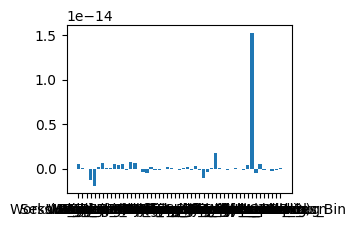

In [13]:
X_plt = df.drop(columns='Calories_Burned').columns
Y_plt = X_train_scaled.mean(axis=0)

plt.subplot(2,2,1)
plt.bar(X_plt,Y_plt)

Y_plt_2 = X_test_scaled.mean(axis=0)
plt.subplot(2,2,2)
plt.bar(X_plt,Y_plt_2)

In [14]:
X_test_scaled

,copy,True
,with_mean,True
,with_std,True


In [ ]:
X_plt,Y_plt

In [57]:
a = np.array([[40, 10], [50, 11]])
a.mean(axis=0)

array([45. , 10.5])

In [12]:
for i,v in enumerate(Y_plt):
    if i>25:
        print(i,v)

26 1.2221335055073723e-16
27 2.2642628512888527e-16
28 -1.7289873236829103e-16
29 3.325340003357269e-16
30 -7.010688326166321e-17
31 -1.0461557546174541e-15
32 -3.666400516522117e-16
33 7.579122514774402e-17
34 1.8384109049899658e-15
35 8.621251860555882e-17
36 3.5053441630831607e-17
37 -9.947598300641403e-17
38 -9.473903143468002e-18
39 7.768600577643762e-17
40 -2.7474319116057207e-17
41 -1.7621459846850484e-16
42 4.144832625267251e-16
43 1.5280932075256713e-14
44 -4.092726157978177e-16
45 5.276964050911677e-16
46 -8.147556703382482e-17
47 -1.1131836193574903e-17
48 -2.5105843330190208e-16
49 -1.0800249583553523e-16
50 6.679101716144942e-17


In [10]:
print(X_plt[20])
print(len(Y_plt))

meal_type
51
